<a href="https://colab.research.google.com/github/abojha/dataPrivacyLab/blob/main/laplace_mechanism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("/content/drive/MyDrive/DP_Lab/preprocessed_adult.csv")

In [52]:
df

,age,education,relationship,sex,race,income
0,56,HS-grad,Husband,Male,White,>50K
1,56,9th,Husband,Male,Black,<=50K
2,55,HS-grad,Unmarried,Female,Amer-Indian-Eskimo,<=50K
3,42,Doctorate,Not-in-family,Male,White,>50K
4,60,Some-college,Husband,Male,White,>50K
...,...,...,...,...,...,...
15677,39,HS-grad,Husband,Male,White,<=50K
15678,40,Doctorate,Husband,Male,White,>50K
15679,42,HS-grad,Unmarried,Female,White,<=50K
15680,51,Assoc-voc,Husband,Male,White,<=50K


In [53]:
quasi_identifiers = ["age", "education", "relationship", "sex", "race"]


df["income"] = df["income"].apply(lambda x: np.random.randint(20000, 90000) if x == "<=50K" else np.random.randint(50000, 150000))
sensitive_attribute = "income"

In [54]:
df

,age,education,relationship,sex,race,income
0,56,HS-grad,Husband,Male,White,87433
1,56,9th,Husband,Male,Black,72358
2,55,HS-grad,Unmarried,Female,Amer-Indian-Eskimo,56140
3,42,Doctorate,Not-in-family,Male,White,105048
4,60,Some-college,Husband,Male,White,99049
...,...,...,...,...,...,...
15677,39,HS-grad,Husband,Male,White,40407
15678,40,Doctorate,Husband,Male,White,74462
15679,42,HS-grad,Unmarried,Female,White,84006
15680,51,Assoc-voc,Husband,Male,White,53751


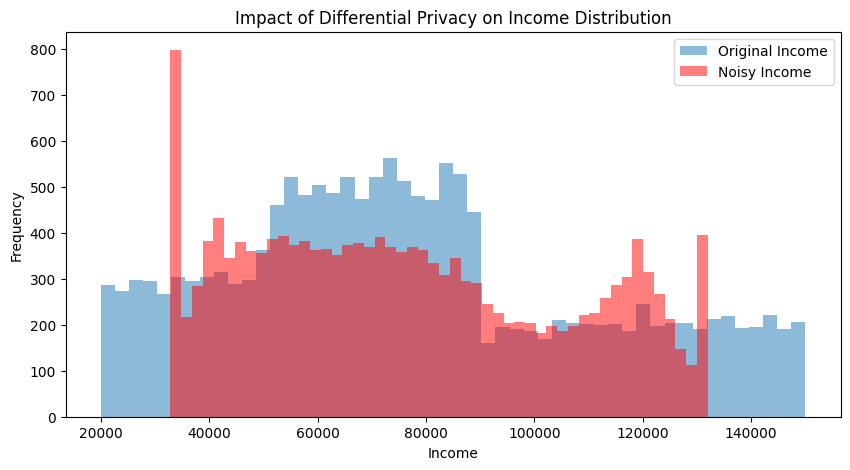

   income  income_clipped  income_noisy
0   87433         87433.0  91164.256456
1   72358         72358.0  71703.113043
2   56140         56140.0  41590.940509
3  105048        105048.0  98596.128349
4   99049         99049.0  96199.491876
5   22247         41059.2  32847.360000
6   55635         55635.0  40648.279903
7   47965         47965.0  45089.716960
8   50404         50404.0  81721.620036
9   38232         41059.2  47862.441934


In [55]:
# Define privacy parameters and assumptions
epsilon = 5.0  # Increased privacy budget to reduce noise
clip_min, clip_max = df["income"].quantile(0.15), df["income"].quantile(0.85)  # Tighter clipping range

df["income_clipped"] = df["income"].clip(clip_min, clip_max)  # Clipping to reduce sensitivity

# Assumption: Sensitivity calculation
# The sensitivity of the income attribute is defined as the difference between the max and min values in the clipped range.
delta_f_clipped = clip_max - clip_min  # Sensitivity after clipping

# Apply Laplace noise with reduced scale
laplace_noise = np.random.laplace(loc=0, scale=(delta_f_clipped / (epsilon * 2)), size=len(df))

# Apply noise and limit extreme values
df["income_noisy"] = np.clip(df["income_clipped"] + laplace_noise, clip_min * 0.8, clip_max * 1.1)

# Proof of Differential Privacy
# Laplace Mechanism ensures (ε)-Differential Privacy by adding noise drawn from Lap(0, Δf/ε)
# The probability density function of Laplace noise is: f(x|μ, b) = (1 / 2b) * exp(-|x - μ| / b)
# This ensures indistinguishability of an individual's income within the dataset

def laplace_pdf(x, mu, b):
    return (1 / (2 * b)) * np.exp(-abs(x - mu) / b)

# Visualizing the impact of noise
plt.figure(figsize=(10, 5))
plt.hist(df["income"], bins=50, alpha=0.5, label="Original Income")
plt.hist(df["income_noisy"], bins=50, alpha=0.5, label="Noisy Income", color='r')
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.legend()
plt.title("Impact of Differential Privacy on Income Distribution")
plt.show()

# Display a sample of the noisy dataset
print(df[["income", "income_clipped", "income_noisy"]].head(10))

# Proof of Differential Privacy
# Laplace Mechanism ensures (ε)-Differential Privacy by adding noise drawn from **Lap(0, Δf/ε)**
# The probability density function of Laplace noise is:
**f(x|μ, b) = (1 / 2b) * exp(-|x - μ| / b)**
# This ensures indistinguishability of an individual's income within the dataset